In [ ]:
################# Importing the Dataset for the HR Employee Attrition Prediction
################# Step 1. Mounting the Google Drive to get the csv file
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


# **Importing the required libraries**

In [ ]:
## Importing all the important packages for the python code dependable

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,f1_score,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

# **Loading the dataset**

In [ ]:
### Hr data imported directly to the google drive read from the dirve itself
hr_data = pd.read_csv("My Drive/hr_employee_attrition.csv")
hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# **EDA**


*  All the important relationships can be learn from the different graphs

In [ ]:
hr_data.info() #understanding the information of the HR data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
label = ["Attrition"] # Traget level or the dependendt variable

features = ["Age", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField", "EmployeeCount", "EmployeeNumber", "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction", "MaritalStatus", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "Over18", "OverTime", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StandardHours", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
print("1. Total number of features: ", len(features)) #all the features or the columns which are present in the dataset

numerical_features = ["Age", "DailyRate", "DistanceFromHome", "EmployeeCount", "EmployeeNumber", "HourlyRate", "MonthlyIncome", "MonthlyRate", "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
print("2. Total number of numerical features: ", len(numerical_features)) ## All the numerical features in the data
categorical_features = ["BusinessTravel", "Department", "Education", "EducationField", "EnvironmentSatisfaction", "Gender", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction", "MaritalStatus", "NumCompaniesWorked", "Over18", "OverTime", "TrainingTimesLastYear", "OverTime", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]
print("3. Total number of categorical features: ", len(categorical_features)) ## All the categorical data


1. Total number of features:  34
2. Total number of numerical features:  14
3. Total number of categorical features:  20


Analysis of Numerical Features to uncerstand the insights of the data

In [ ]:
hr_data.describe() #describing the statistical metrics of the data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


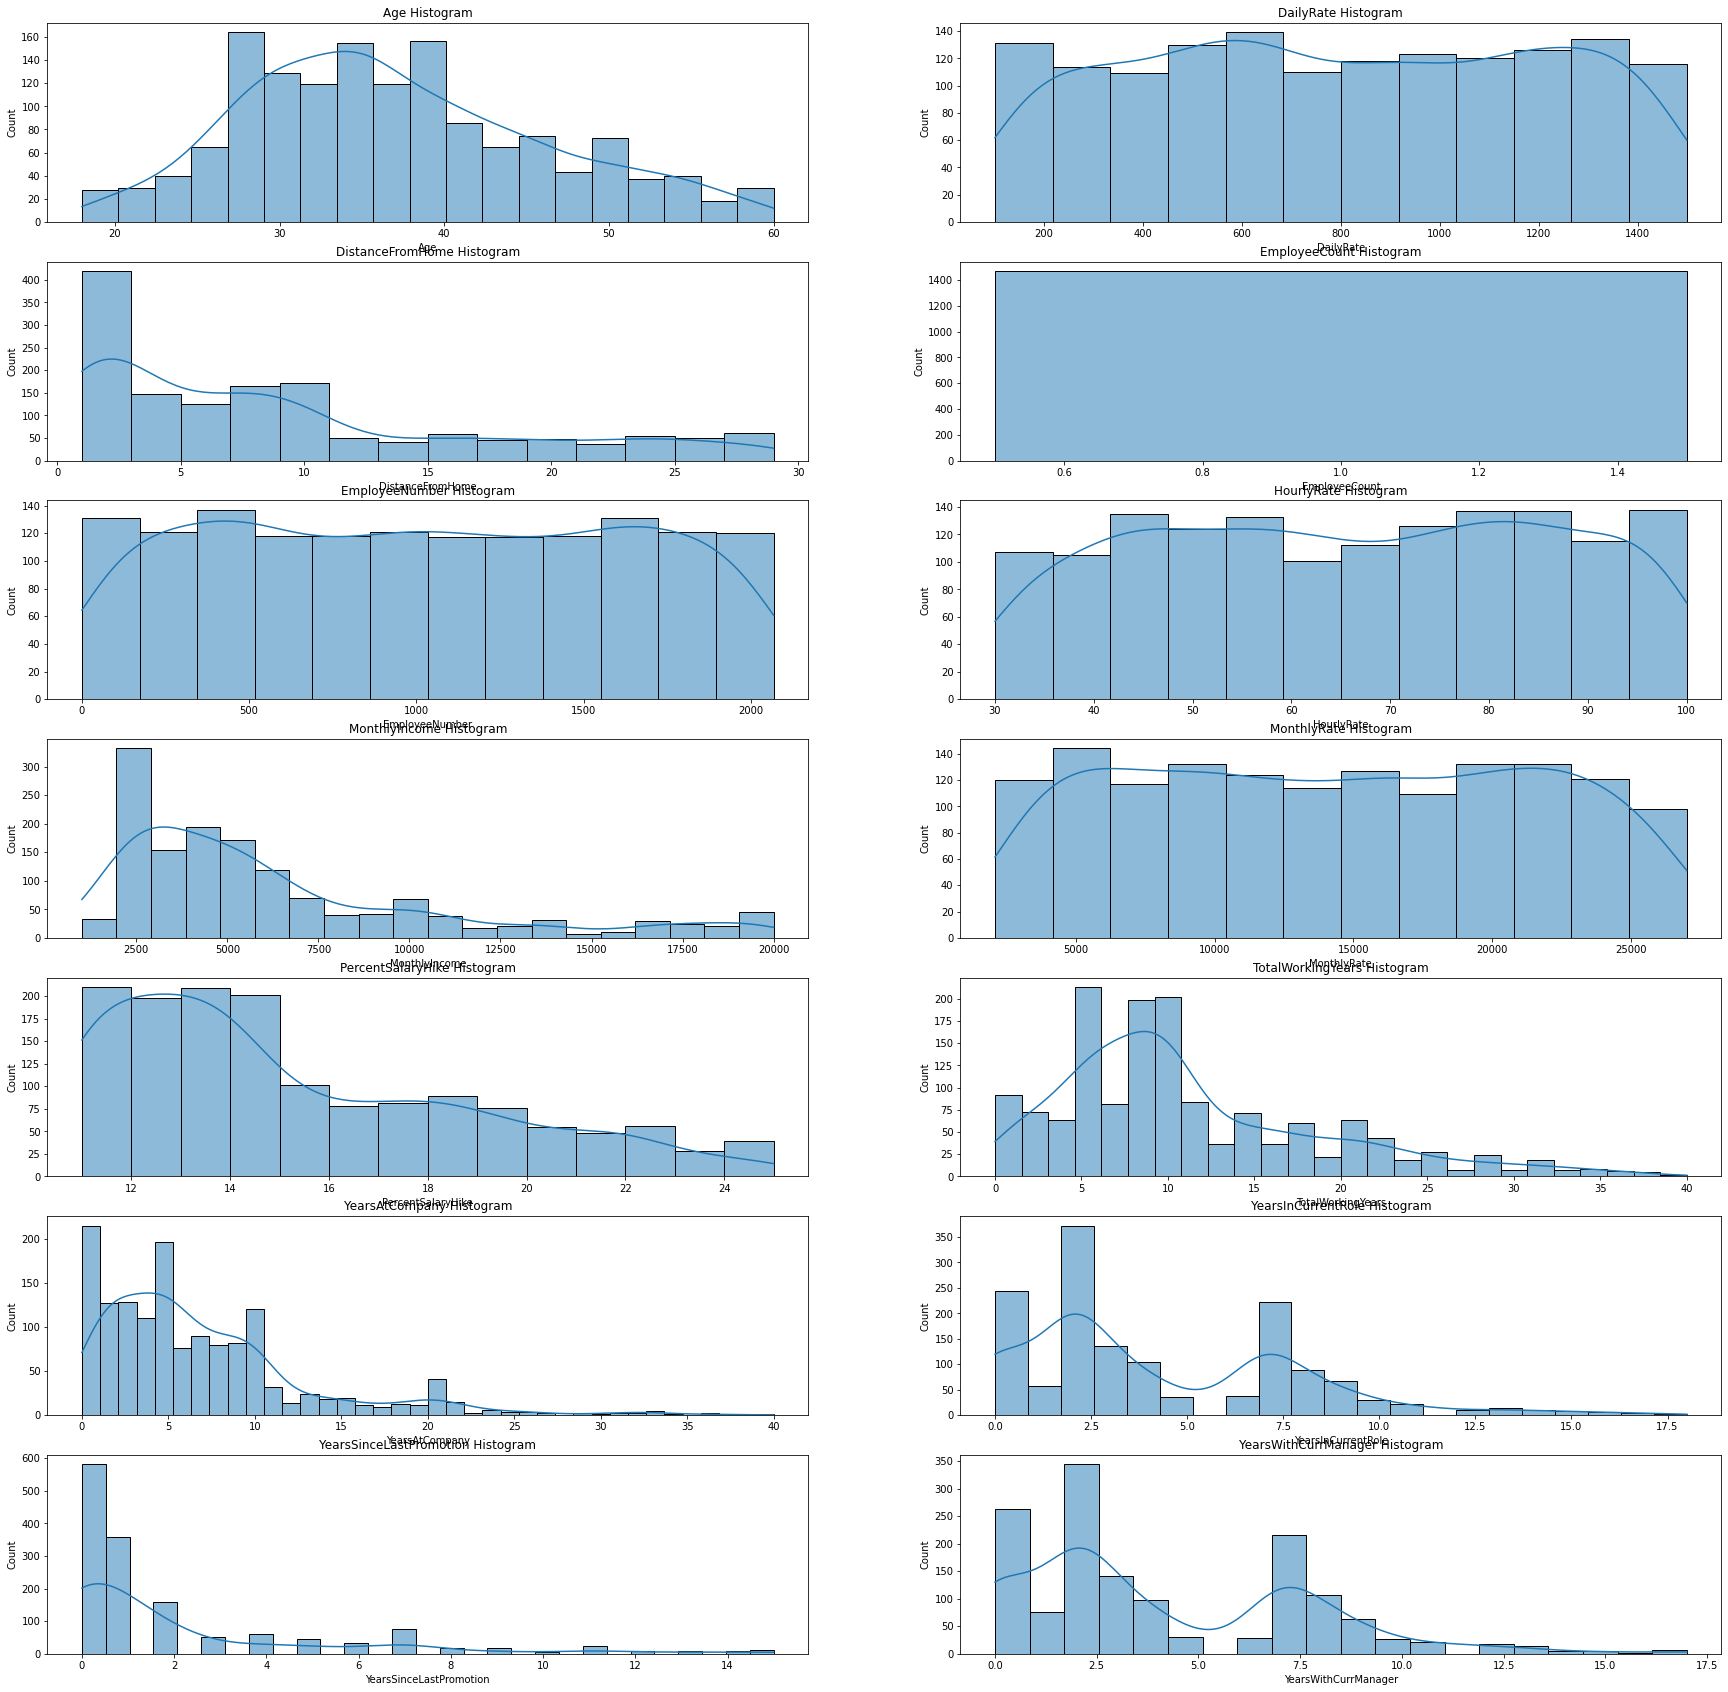

In [ ]:
##ploting the figurs using the Subplots- Histogram plots
plt.figure(figsize = (30,30))
for i, feature in enumerate(numerical_features):
    hist_graph = plt.subplot(7, 2, i+1)
    sns.histplot(hr_data[feature],kde = True)
    hist_graph.set_title(feature + " Histogram")

*   checking the outliers if any present in the dataset

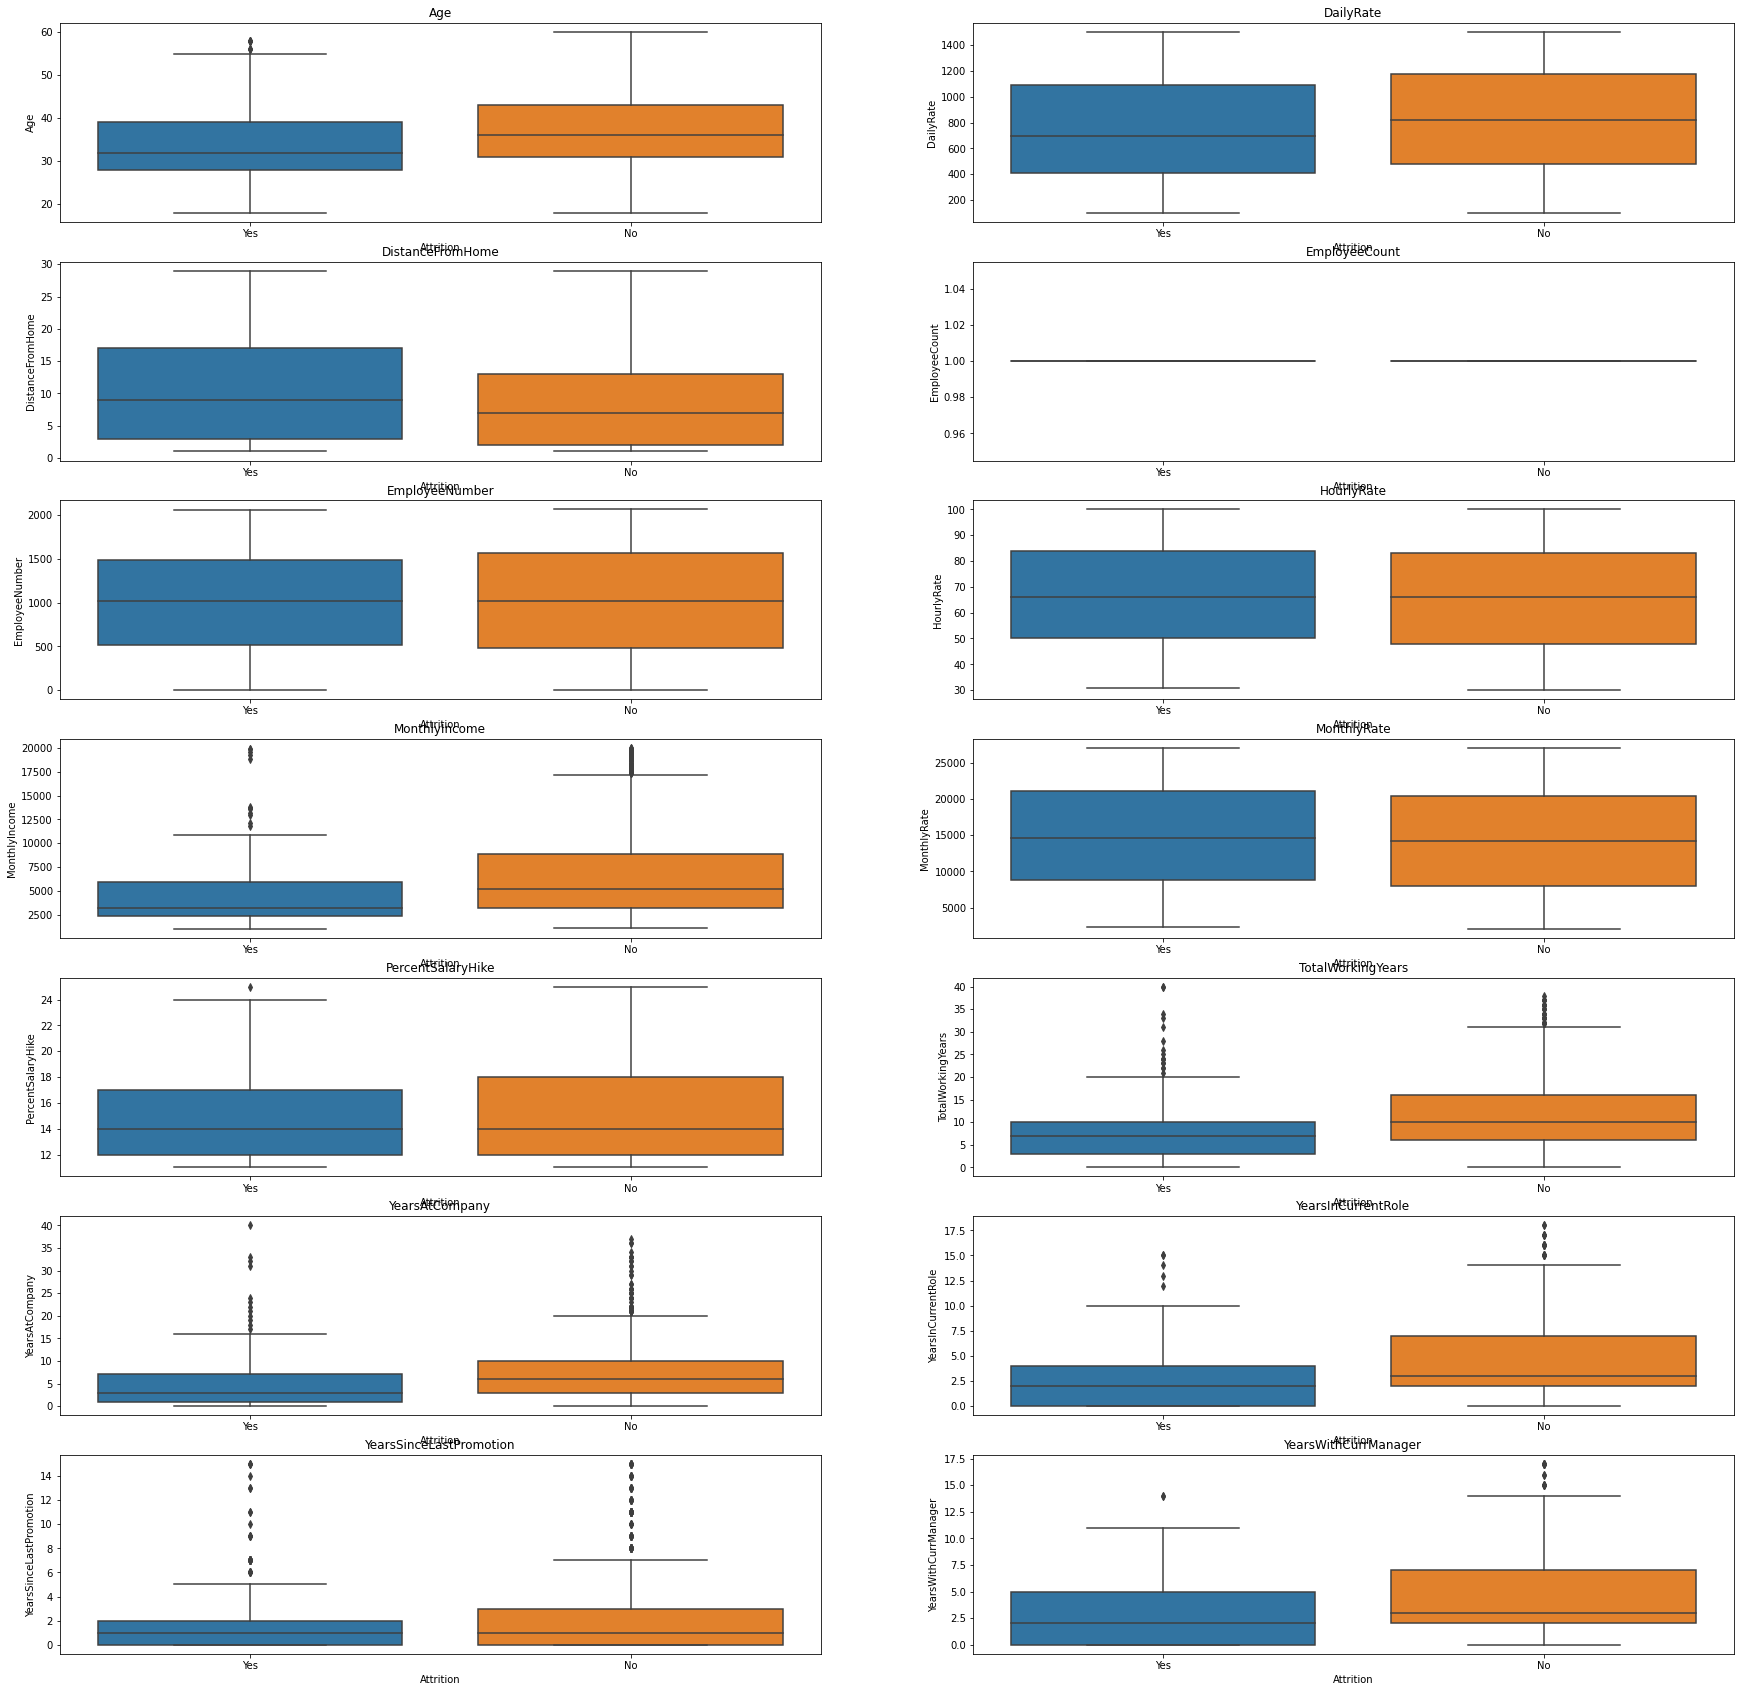

In [ ]:
### Plotting the features in box plot to check if any points outside the box plot are there or not
plt.figure(figsize = (30,30))
for i, feature in enumerate(numerical_features):
    hist_graph = plt.subplot(7, 2, i+1)
    sns.boxplot(y = hr_data[feature], x = hr_data["Attrition"])
    hist_graph.set_title(feature)

*   Analysis of Categorical Features - all are pei charts to understand the percentage of contribution of each of the features values in the feature of the data

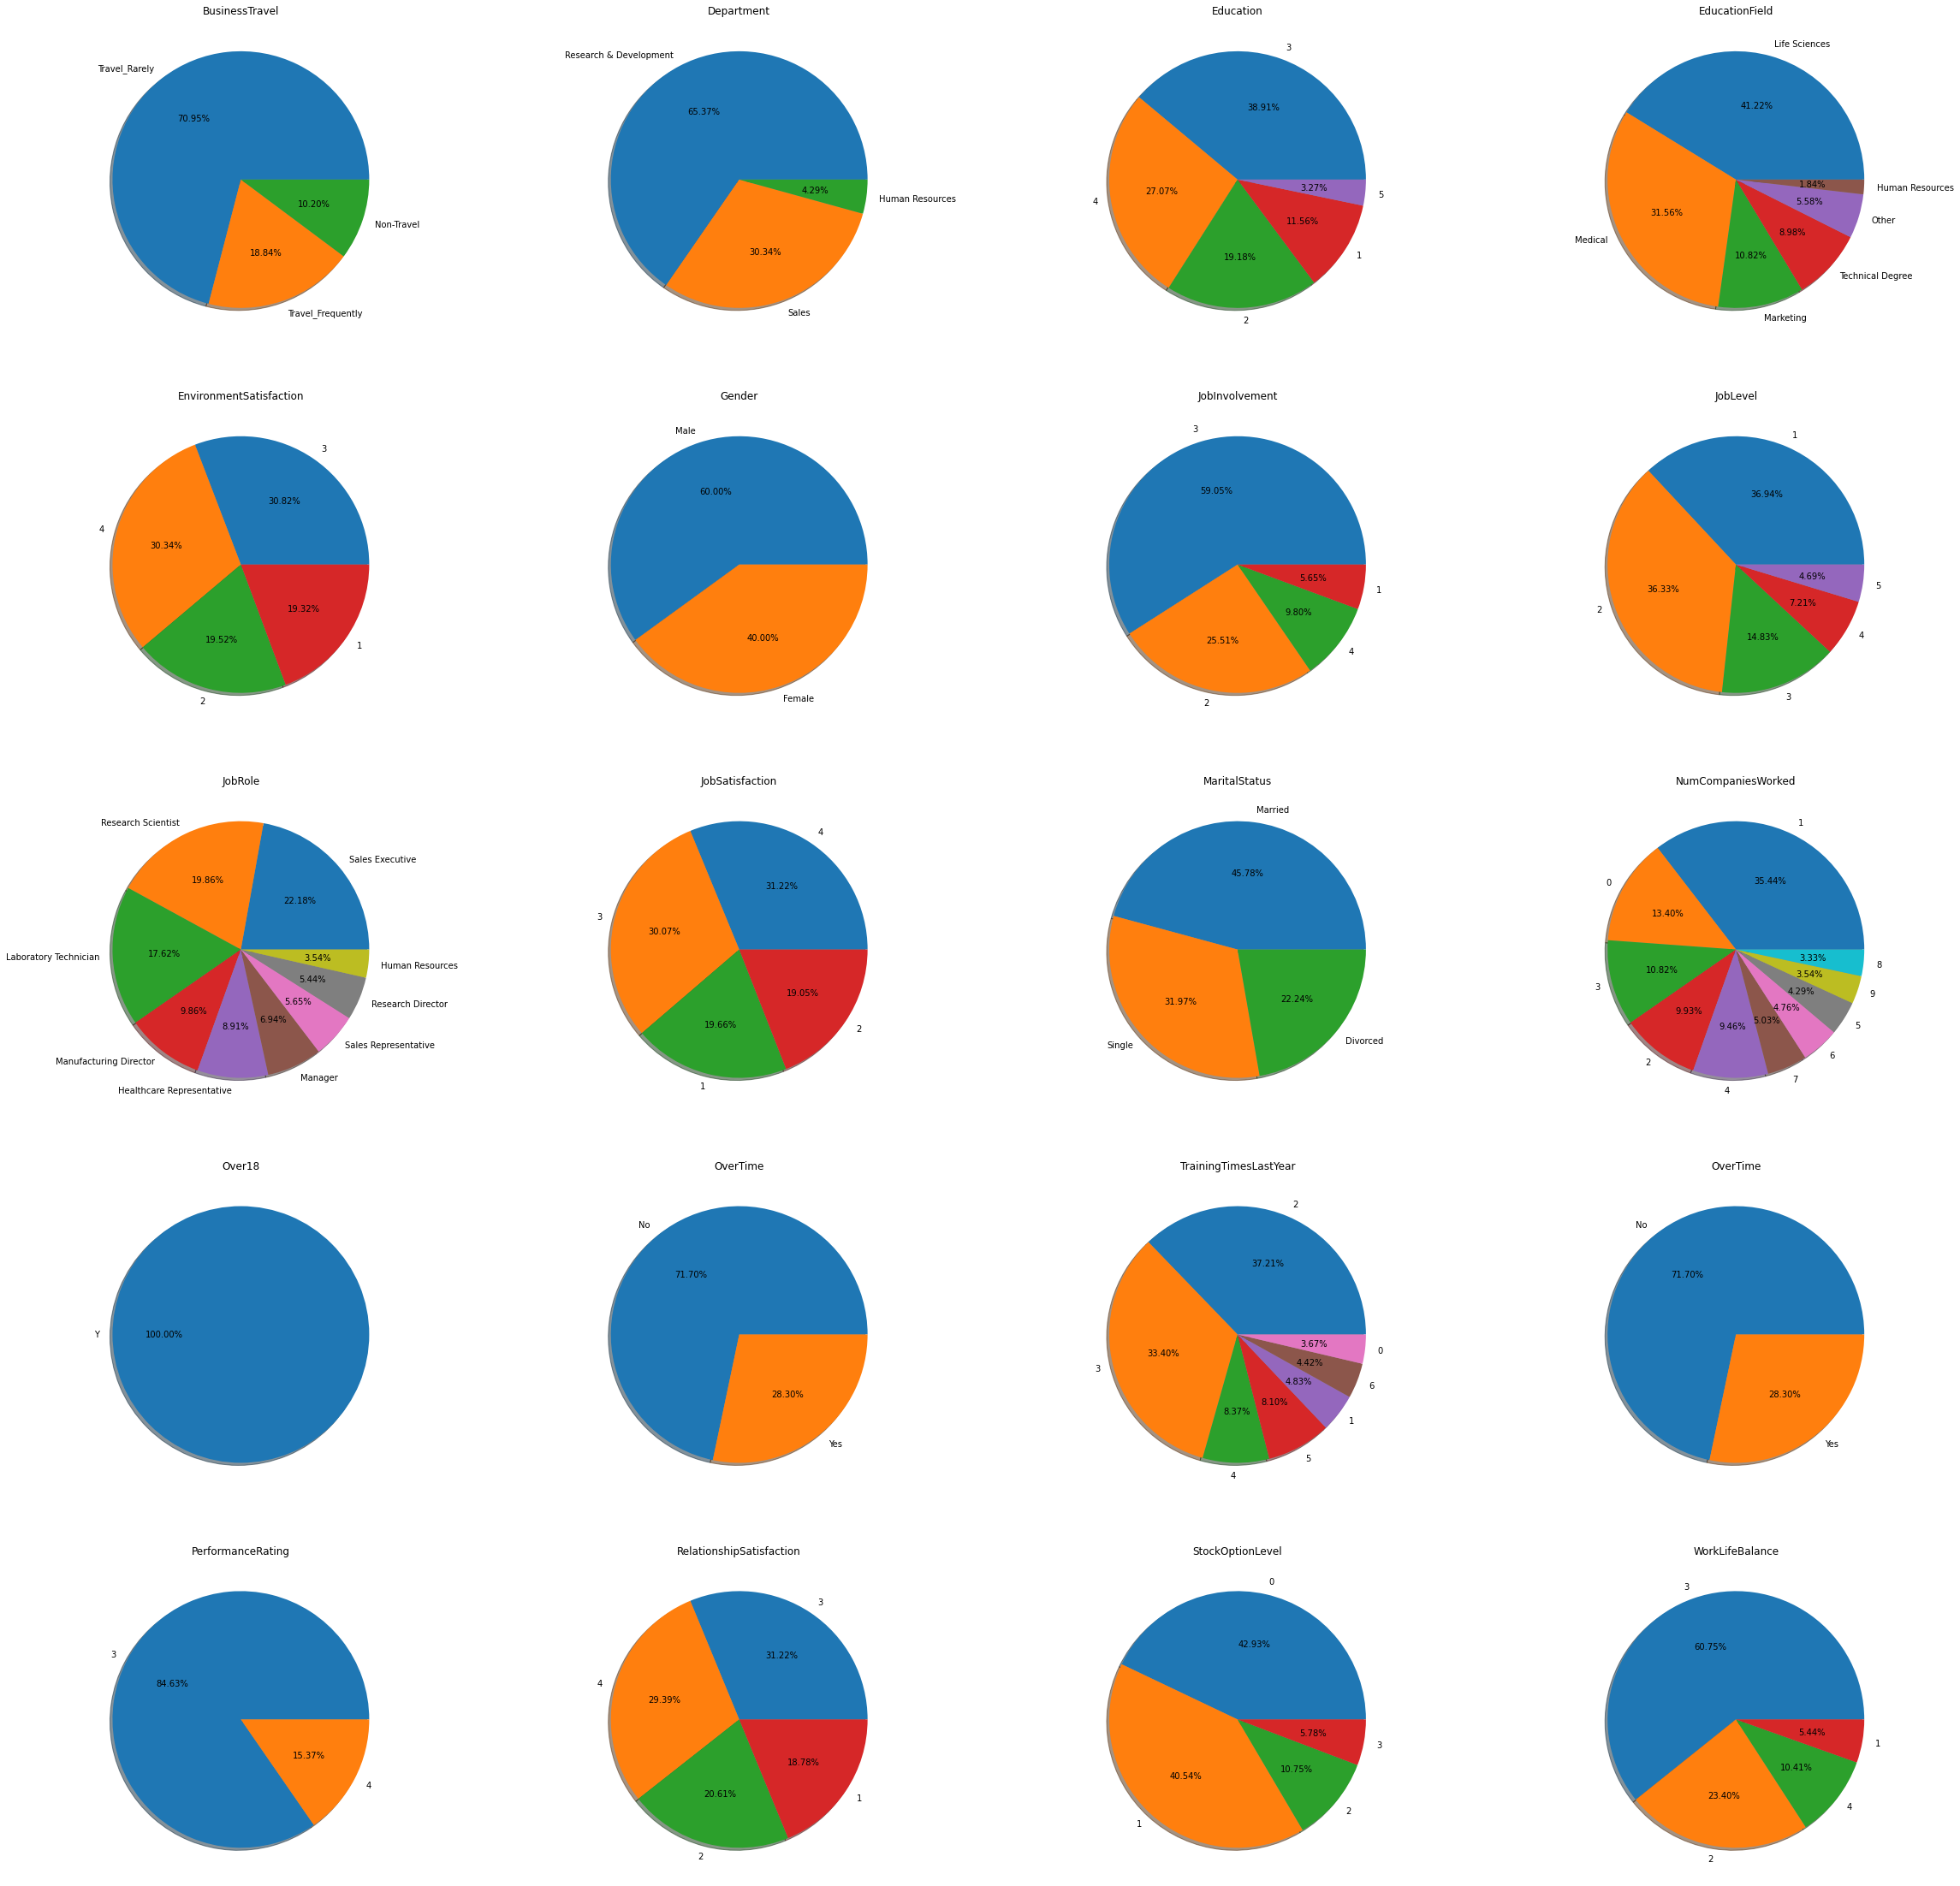

In [ ]:
### Pie chart plots for nderstanding the data coverage
plt.figure(figsize = (40,40))
for i, feature in enumerate(categorical_features):
    labels = hr_data[feature].value_counts().index
    size = hr_data[feature].value_counts().values
    pie_graph = plt.subplot(5, 4, i+1)
    pie_graph.pie(size, labels = labels, shadow = True, autopct = "%.2f%%")
    plt.title(feature)
    pie_graph.axis("off")

*   **Features vs Attrition** analysis in the dataset

## **1.   Age**

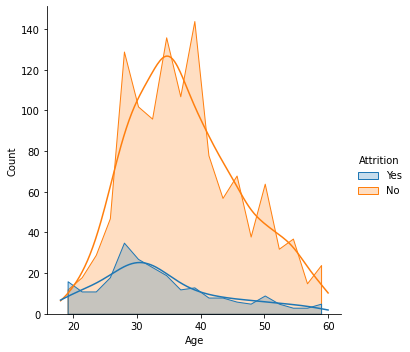

In [ ]:
sns.displot(x = "Age", hue = "Attrition",element = "poly", data = hr_data, kde = True)

Outcome: Attrition rate is high in the late 20's to early 30's

## **2.   Monthly income**

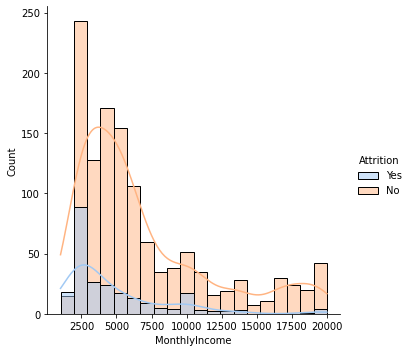

In [ ]:
sns.displot(x = "MonthlyIncome", hue = "Attrition", data = hr_data,kde = True,palette = "pastel")

It is found that Attrition rate is very high towards the low income category

## **3.   Department & Gender**

In [ ]:
### Plotting and analysing the analysis of the department and gender with the attrition within the data

plot_hr_data = hr_data.groupby(["Gender","Department"])["Attrition"].value_counts(normalize=True)
plot_hr_data = plot_hr_data.mul(100).rename("Percent").reset_index()
figure = px.bar(plot_hr_data, x="Department", y="Percent", color="Attrition", barmode="group",
            text="Percent", opacity=.75, facet_col="Gender", category_orders={"Attrition": ["Yes", "No"]},
            color_discrete_map={"Yes": "#C02B34","No": "#CDBBA7"})
figure.update_traces(texttemplate="%{text:.3s}%", textposition="outside",
                  marker_line=dict(width=1, color="#28221D"),  width=.4)
figure.update_layout(title_text="Attrition Rates by Department and Gender", yaxis_ticksuffix = "%",
                  paper_bgcolor="#F4F2F0", plot_bgcolor="#F4F2F0",font_color="#28221D",xaxis=dict(tickangle=30))
figure.update_xaxes(showticklabels=True,tickangle=30,col=2)
figure.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor="#28221D")
figure.show()

Analysis report: In Human Resources Dept., women attrition is higher whereas the attrition rate of men is high in the Sales Dept

# **4.   Job Satisfaction**

In [ ]:
#### Ploting the Job Satisfaction with the attrition
plot_hr_data = hr_data.groupby(["Attrition"])["JobSatisfaction"].value_counts(normalize=True)
plot_hr_data = plot_hr_data.mul(100).rename("Percent").reset_index().sort_values("JobSatisfaction")
plot_hr_data.JobSatisfaction=pd.Categorical(plot_hr_data.JobSatisfaction).rename_categories(
    {1:"Poor", 2:"Neutral", 3:"Good", 4:"Excellent"})
figure = px.bar(plot_hr_data, x="JobSatisfaction", y="Percent", text="Percent", opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
figure.update_traces(texttemplate="%{text:.2s}%", textposition="outside",
                  marker_color=["#B6735F", "#D7C2B0", "#497B7A", "#9EB5A3"],
                  marker_line=dict(width=1, color="#28221D"))
figure.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor="#28221D", ticksuffix="%")
figure.update_layout(title_text="Attrition Rates by Job Satisfaction", bargap=.09,font_color="#28221D",
                  xaxis_title="Job Satisfaction",paper_bgcolor="#F4F2F0", plot_bgcolor="#F4F2F0")
figure.show()

Results Output: 28% people left the job as they weren"t satisfied with their Job

# **5.   Years of service in the Company**

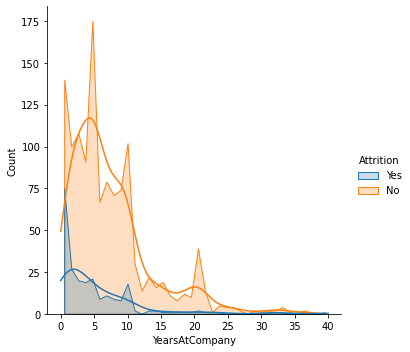

In [ ]:
### Plotting the Years of service within the company
sns.displot(x = "YearsAtCompany",element = "poly", hue = "Attrition", data = hr_data,kde = True)

Results Output: Attrition rate is high at the beginning of the tenure and gradually decreases with increase in the service tenure

# **6.   Gender**

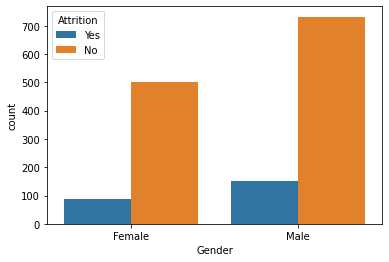

In [ ]:
sns.countplot(x = "Gender",hue = "Attrition",data = hr_data)

**Attrition is high in male employees**

# **7.   Overtime**

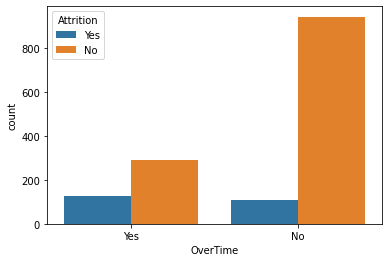

In [ ]:
sns.countplot(x = "OverTime",hue = "Attrition",data = hr_data)

# **Data Preprocessing**

*   **Remove redundant columns**

In [ ]:
hr_data.drop(["EmployeeCount", "Over18", "EmployeeNumber", "StandardHours"], axis=1, inplace=True)

*   **Analyse the correlation among the features using correlation matrix**

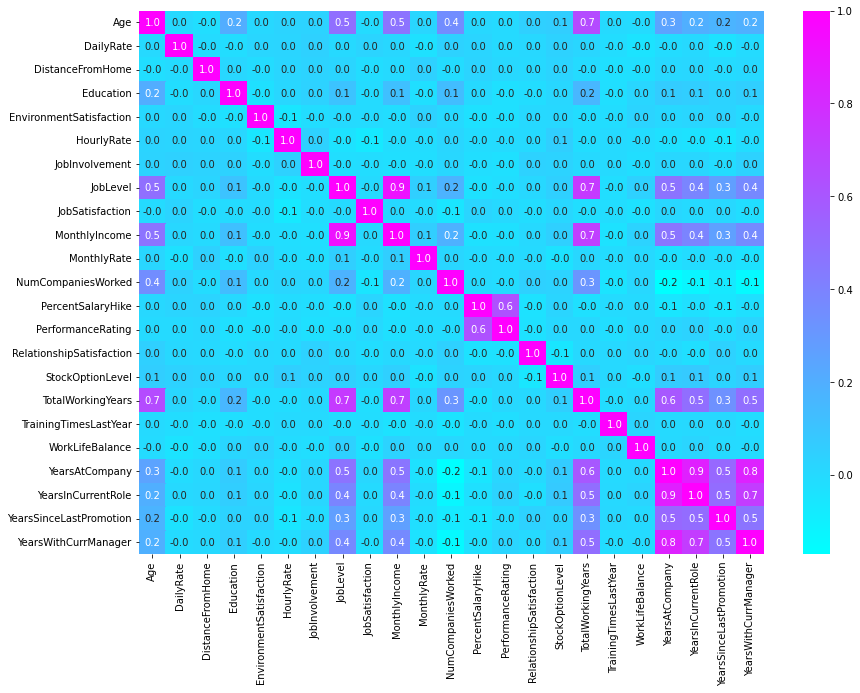

In [ ]:
remaining_features = ["Age", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField", "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction", "MaritalStatus", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "OverTime", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
figure = plt.figure(figsize=(14,10))
sns.heatmap(hr_data[remaining_features].corr(method = "spearman"),
                annot=True,
                fmt = ".1f",
                cmap = "cool")
plt.show()

In [ ]:
hr_data.drop(["TotalWorkingYears", "YearsInCurrentRole", "JobLevel", "YearsWithCurrManager"],axis=1, inplace=True)

*   **Converting text data into numerical data using Label Encoding**

In [ ]:
label_encoder = LabelEncoder()
text_data = ["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus", "OverTime"]
for i in text_data:
  hr_data[i] = label_encoder.fit_transform(hr_data[i])
print("Encoded data: ")
hr_data[text_data]

Encoded data: 


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


*   **Scaling the numerical features**

In [ ]:
numerical_features = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate", "PercentSalaryHike", "YearsAtCompany", "YearsSinceLastPromotion"]
sc = StandardScaler()
for feature in numerical_features:
    hr_data[feature] = sc.fit_transform(np.array(hr_data[feature]).reshape(-1,1))

*   **Removing data imbalance using SMOTE**

Before Sampling

In [ ]:
hr_data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

After Resampling

In [ ]:
hr_data_columns = list(hr_data.columns)
balanced_data,target = SMOTE().fit_resample(hr_data[hr_data_columns],hr_data["Attrition"])
balanced_data["Attrition"].value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

*   **Splitting the data into train and test**

In [ ]:
X = balanced_data.drop("Attrition", axis=1)
y = balanced_data["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y, shuffle = True)

print("Training Feature Size : ",len(X_train))
print("Testing Feature Size : ",len(X_test))
print("Training Label Size : ",len(y_train))
print("Testing Label Size : ",len(y_test))

Training Feature Size :  1726
Testing Feature Size :  740
Training Label Size :  1726
Testing Label Size :  740


*   **Model Evaluation Using Cross Validation on complete data**

In [ ]:
models = [LogisticRegression(), KNeighborsClassifier(), svm.SVC(kernel = "linear"), GaussianNB(), DecisionTreeClassifier(criterion = "entropy",max_depth = 3), RandomForestClassifier(n_estimators = 1000), AdaBoostClassifier(n_estimators=1000), xgb.XGBClassifier(n_estimators=1000), LGBMClassifier()]
accuracy = []
mean_acc = []
for i in models:
    print(i,":")
    model = i
    cv_result = cross_val_score(model, X, y, cv = 5, scoring = "accuracy")
    mean_acc.append(cv_result.mean())
    accuracy.append(cv_result)
    y_pred = cross_val_predict(model, X, y, cv=5)
    print(classification_report(y, y_pred))
    print()

LogisticRegression() :
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1233
           1       0.80      0.79      0.80      1233

    accuracy                           0.80      2466
   macro avg       0.80      0.80      0.80      2466
weighted avg       0.80      0.80      0.80      2466


KNeighborsClassifier() :
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      1233
           1       0.76      0.99      0.86      1233

    accuracy                           0.84      2466
   macro avg       0.87      0.84      0.83      2466
weighted avg       0.87      0.84      0.83      2466


SVC(kernel='linear') :
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1233
           1       0.81      0.80      0.81      1233

    accuracy                           0.81      2466
   macro avg       0.81      0.81      0.81      2466
w

*   **Model Evaluation on test data**

LogisticRegression() :
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       370
           1       0.82      0.82      0.82       370

    accuracy                           0.82       740
   macro avg       0.82      0.82      0.82       740
weighted avg       0.82      0.82      0.82       740




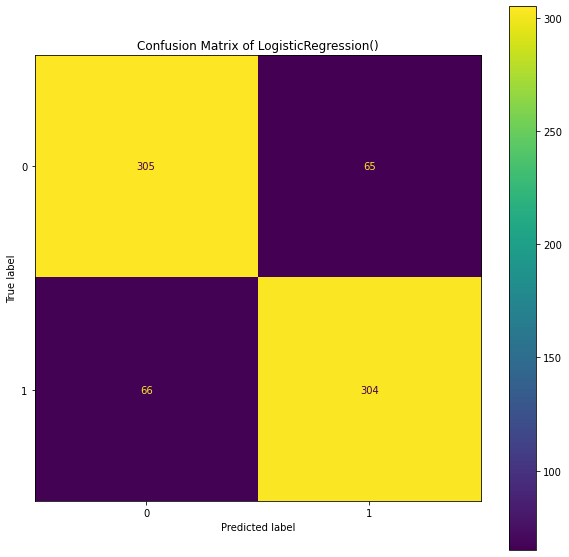

KNeighborsClassifier() :
              precision    recall  f1-score   support

           0       0.96      0.70      0.81       370
           1       0.77      0.97      0.86       370

    accuracy                           0.84       740
   macro avg       0.86      0.84      0.83       740
weighted avg       0.86      0.84      0.83       740




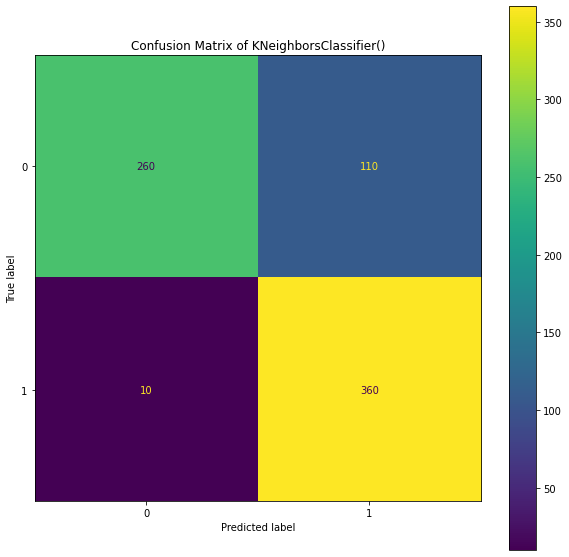

SVC(kernel='linear') :
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       370
           1       0.82      0.83      0.82       370

    accuracy                           0.82       740
   macro avg       0.82      0.82      0.82       740
weighted avg       0.82      0.82      0.82       740




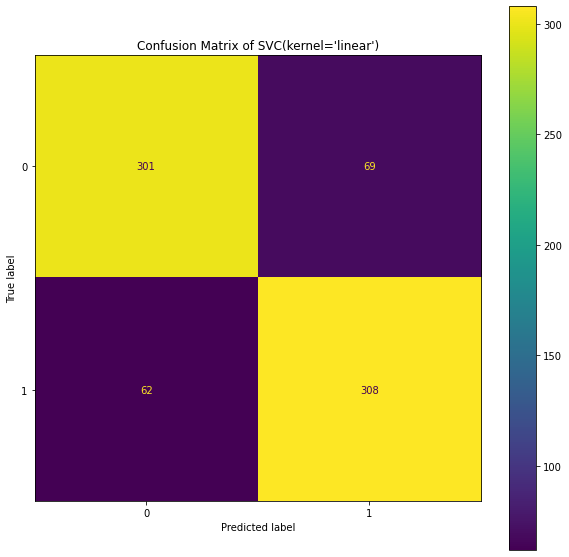

GaussianNB() :
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       370
           1       0.77      0.82      0.79       370

    accuracy                           0.79       740
   macro avg       0.79      0.79      0.79       740
weighted avg       0.79      0.79      0.79       740




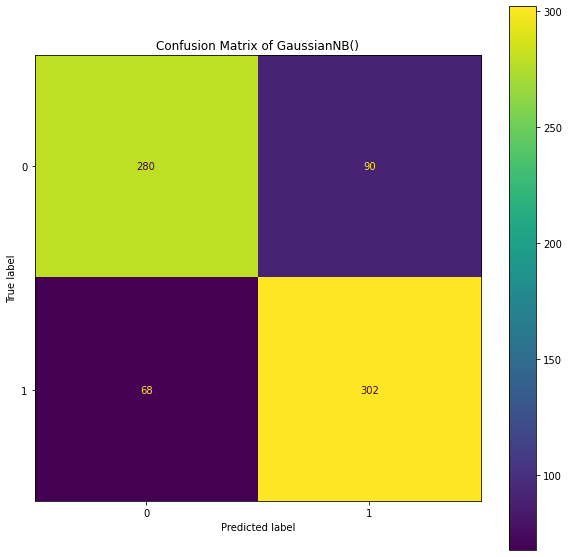

DecisionTreeClassifier(criterion='entropy', max_depth=3) :
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       370
           1       0.69      0.83      0.75       370

    accuracy                           0.73       740
   macro avg       0.74      0.73      0.72       740
weighted avg       0.74      0.73      0.72       740




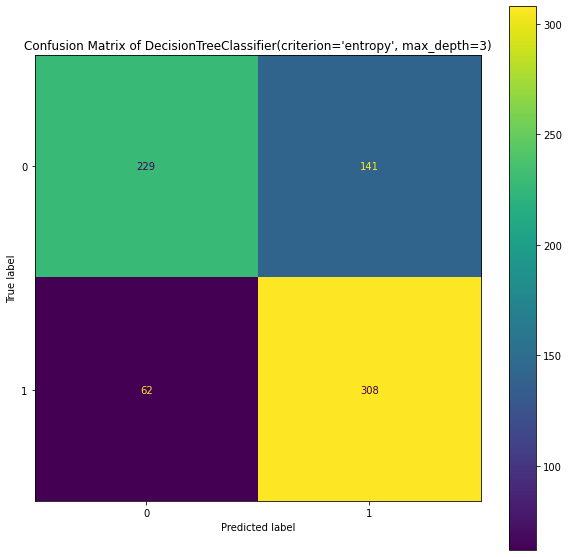

RandomForestClassifier(n_estimators=1000) :
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       370
           1       0.93      0.89      0.91       370

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740




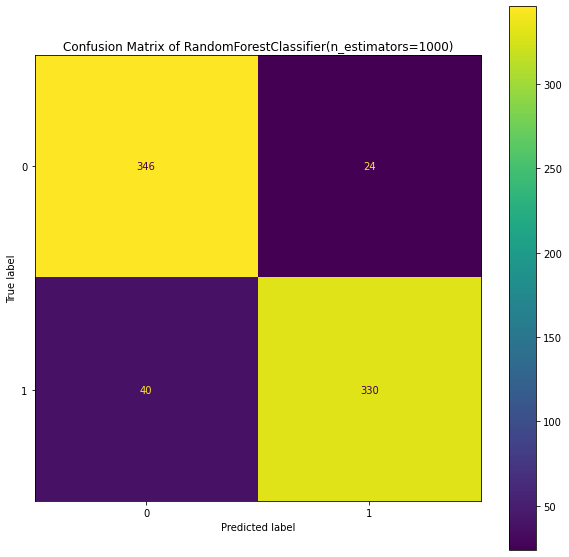

AdaBoostClassifier(n_estimators=1000) :
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       370
           1       0.90      0.88      0.89       370

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740




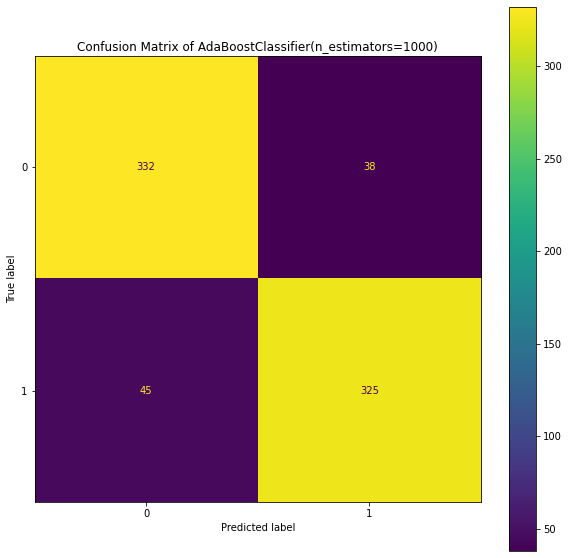

XGBClassifier(n_estimators=1000) :
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       370
           1       0.93      0.90      0.91       370

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740




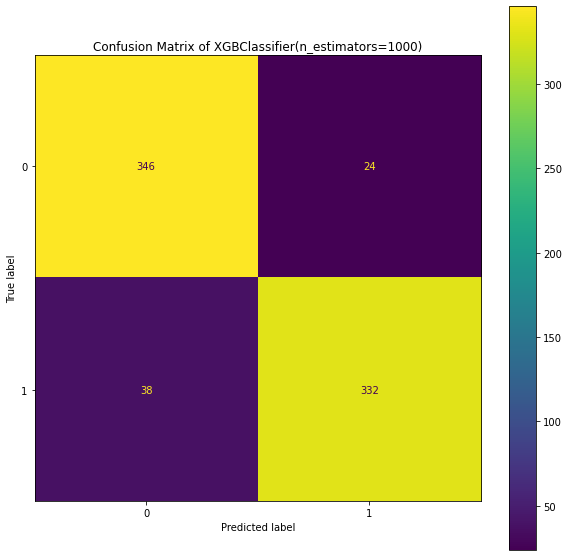

LGBMClassifier() :
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       370
           1       0.91      0.90      0.91       370

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740




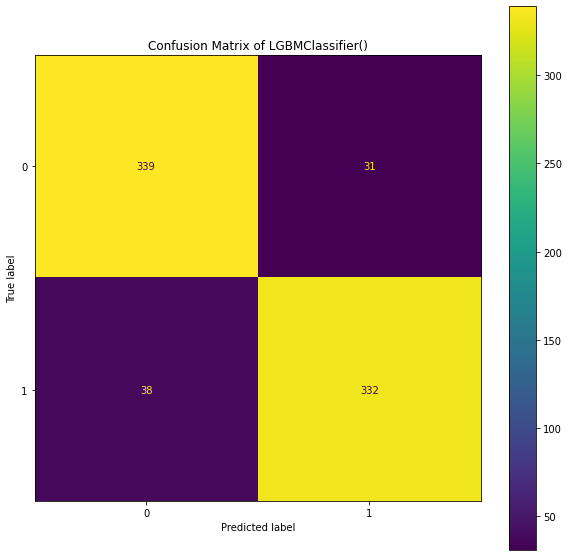

In [ ]:
for i in models:
    print(i,":")
    model = i
    final_model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    print()
    cm = confusion_matrix(y_test,model.predict(X_test))
    classes = ["0","1"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title("Confusion Matrix of "+str(model))
    disp = disp.plot(ax=ax)
    plt.show()

**Best model based on F1 Score: LGBM Classifier**

Hyper parametrs tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
#Hyperparameters setting
dtcp = {'criterion':['gini','entropy'],'max_features':['sqrt',None,'log2']}
lrp = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20)}
svmp = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
rfcp = {'n_estimators' : [10,50,100,200],'max_features' : ['sqrt',None,'log2']}
xgbcp = {'eta':[0.1,0.5],'gamma':[0,10],'max_depth':[1,3,5]}
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
knn_params = { 'n_neighbors' : [5,7,9,11,13,15], 'weights' : ['uniform','distance'], 'metric' : ['minkowski','euclidean','manhattan']}
adb_param = {"base_estimator__criterion" : ["gini", "entropy"], "base_estimator__splitter" :   ["best", "random"]}
lgbm_params = {'bagging_fraction': (0.5, 0.8), 'bagging_frequency': (5, 8), 'feature_fraction': (0.5, 0.8), 'max_depth': (10, 13), 'min_data_in_leaf': (90, 120), 'num_leaves': (1200, 1550)}

# Preparing Classifiers
lr = LogisticRegression()
knn = KNeighborsClassifier()
sv = svm.SVC()
gb = GaussianNB()
dt = DecisionTreeClassifier(criterion = "entropy",max_depth = 5)
rf = RandomForestClassifier(n_estimators = 1000)
ab = AdaBoostClassifier(base_estimator = dt, n_estimators=1000)
xgb1 = xgb.XGBClassifier(n_estimators=1000)
lgb = LGBMClassifier()

#hyper parameters Tuning
#Logistic Regression
clf_lr = GridSearchCV(lr, lrp)
clf_lr.fit(X_train, y_train)
#Decision Trees
clf_dtc = GridSearchCV(dt, dtcp)
clf_dtc.fit(X_train, y_train)
#random forest
clf_rfc = GridSearchCV(rf, rfcp)
clf_rfc.fit(X_train, y_train)
#xgBoost
clf_xgb = GridSearchCV(xgb1, xgbcp)
clf_xgb.fit(X_train, y_train)
#Knn
clf_knn = GridSearchCV(knn, knn_params)
clf_knn.fit(X_train, y_train)
#Adaboost
clf_adb = GridSearchCV(ab, adb_param)
clf_adb.fit(X_train, y_train)
#svm
clf_svm = GridSearchCV(sv, svmp)
clf_svm.fit(X_train, y_train)
#GNB
clf_gnb = GridSearchCV(sv, svmp)
clf_gnb.fit(X_train, y_train)
#LGBM
clf_lgb = GridSearchCV(lgb, lgbm_params)
clf_lgb.fit(X_train, y_train)


# Decision Tree Fitted
decision_tree = DecisionTreeClassifier(criterion= clf_dtc.best_params_['criterion'],max_features=clf_dtc.best_params_['max_features'])
decision_tree.fit(X_train, y_train)
predictions_dt = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)

# Random Forest
random_forest = RandomForestClassifier(n_estimators= clf_rfc.best_params_['n_estimators'], max_features=clf_dtc.best_params_['max_features'])
random_forest.fit(X_train, y_train)
prediction_rf = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_train, y_train) * 100,2)

# logistic Regression
logistic_regression = LogisticRegression(random_state=0,penalty = clf_lr.best_params_['penalty'],C = clf_lr.best_params_['C'])
logistic_regression.fit(X_train, y_train)
prediction_lr = logistic_regression.predict(X_test)
logistic_regression_score = round(logistic_regression.score(X_train, y_train) * 100,2)

# Xg Boost
xg_boost = xgb.XGBClassifier(eta = clf_xgb.best_params_['eta'], gamma = clf_xgb.best_params_['gamma'], max_depth = clf_xgb.best_params_['max_depth'])
xg_boost.fit(X_train, y_train)
prediction_xgb = xg_boost.predict(X_test)
xg_boost_score = round(xg_boost.score(X_train, y_train) * 100,2)

# KNN
k_nn = KNeighborsClassifier(n_neighbors = clf_knn.best_params_['n_neighbors'] , weights  = clf_knn.best_params_['weights'], metric = clf_knn.best_params_['metric'] )
k_nn.fit(X_train, y_train)
prediction_knn = k_nn.predict(X_test)
knn_score = round(k_nn.score(X_train, y_train) * 100,2)

#SVM
svc_m = svm.SVC(C = clf_svm.best_params_['C'], gamma = clf_svm.best_params_['gamma'],kernel = clf_svm.best_params_[ 'kernel'])
svc_m.fit(X_train, y_train)
prediction_svm = svc_m.predict(X_test)
svm_score = round(svc_m.score(X_train, y_train) * 100,2)

#gaussian NB
gnb = clf_gnb#GaussianNB(var_smoothing = clf_gnb.best_params_['var_smoothing'])
gnb.fit(X_train, y_train)
prediction_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_train, y_train) * 100,2)

#adaboost
adb = clf_adb#AdaBoostClassifier(base_estimator__criterion= clf_adb.best_params_["base_estimator__criterion"] , base_estimator__splitter=clf_adb.best_params_["base_estimator__splitter"])
adb.fit(X_train, y_train)
prediction_adb = adb.predict(X_test)
adb_score = round(adb.score(X_train, y_train) * 100,2)

#LGBM
lgbm = LGBMClassifier(bagging_fraction = clf_lgb.best_params_['bagging_fraction'], bagging_frequency=clf_lgb.best_params_['bagging_frequency'], feature_fraction= clf_lgb.best_params_['feature_fraction'], max_depth= clf_lgb.best_params_['max_depth'], min_data_in_leaf = clf_lgb.best_params_['min_data_in_leaf'], num_leaves= clf_lgb.best_params_['num_leaves'])
lgbm.fit(X_train, y_train)
prediction_lgbm = lgbm.predict(X_test)
lgbm_score = round(lgbm.score(X_train, y_train) * 100,2)

print('Decision Tree Performance: ', decision_tree_score)
print('Random Forest Performance: ', random_forest_score)
print('Logistic Regression Performance: ', logistic_regression_score)
print('XgBoost Performance: ', xg_boost_score)
print('SVM Performance: ', svm_score)
print('K Nearest Neighbours: ', knn_score)
print('Gaussian Naive Bayes Performance: ', gnb_score)
print('AdaBoost Performance: ', adb_score)
print('Light GBM Performance: ', lgbm_score)

Decision Tree Performance:  100.0
Random Forest Performance:  100.0
Logistic Regression Performance:  81.81
XgBoost Performance:  99.3
SVM Performance:  100.0
K Nearest Neighbours:  100.0
Gaussian Naive Bayes Performance:  100.0
AdaBoost Performance:  100.0
Light GBM Performance:  97.74


*   **Hyperparameters Tuning on LGBM Classifier**

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       370
           1       0.79      0.81      0.80       370

    accuracy                           0.79       740
   macro avg       0.79      0.79      0.79       740
weighted avg       0.79      0.79      0.79       740




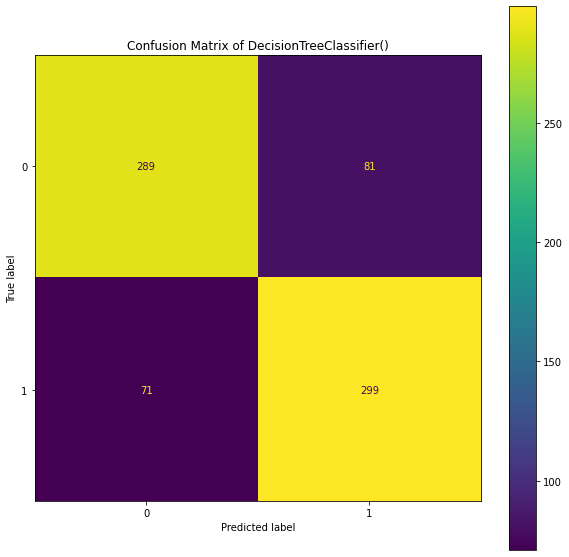

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       370
           1       0.89      0.89      0.89       370

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740




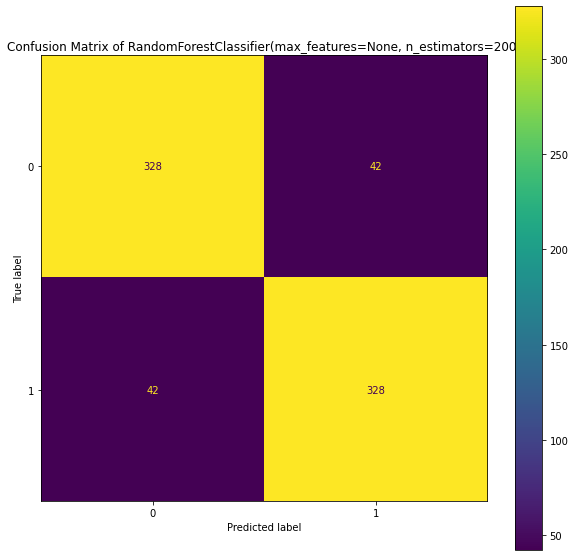

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       370
           1       0.82      0.82      0.82       370

    accuracy                           0.82       740
   macro avg       0.82      0.82      0.82       740
weighted avg       0.82      0.82      0.82       740




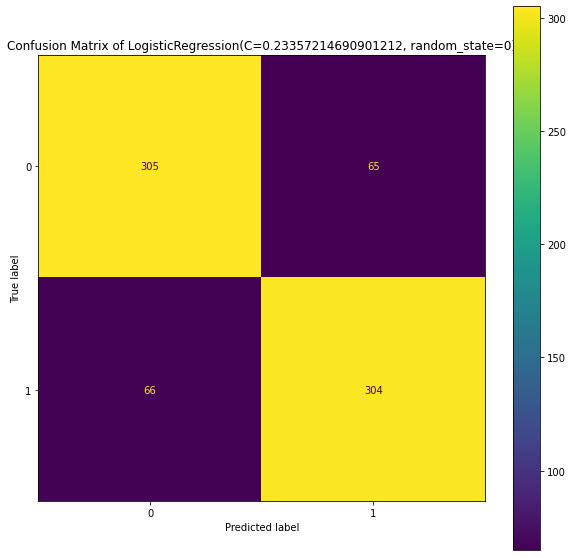

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       370
           1       0.92      0.89      0.90       370

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740




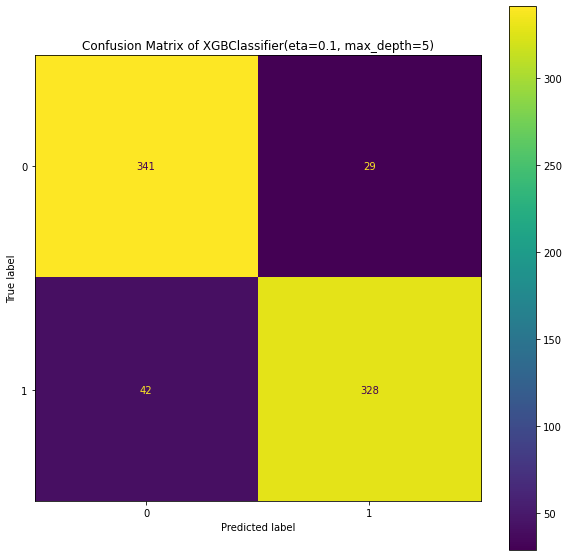

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       370
           1       0.78      0.99      0.87       370

    accuracy                           0.86       740
   macro avg       0.88      0.86      0.85       740
weighted avg       0.88      0.86      0.85       740




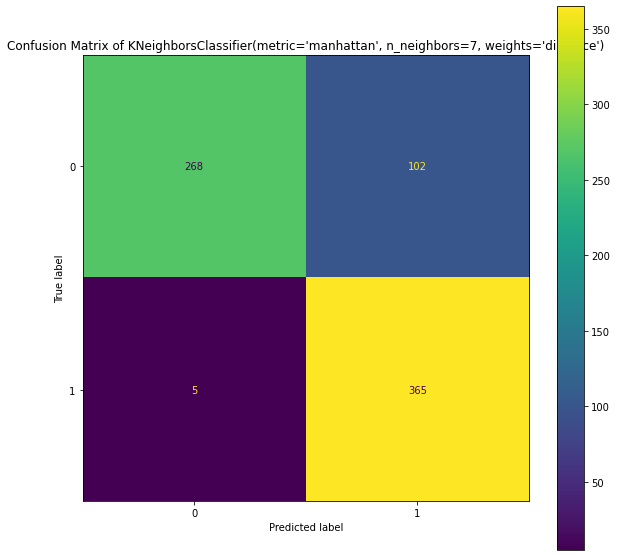

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       370
           1       0.97      0.96      0.96       370

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740




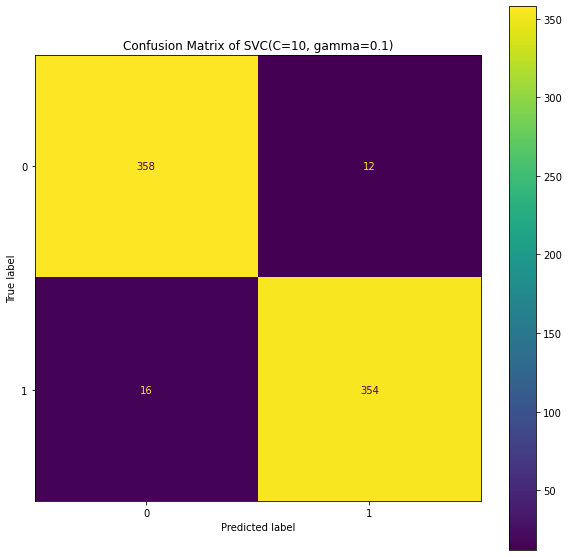

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       370
           1       0.97      0.96      0.96       370

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740




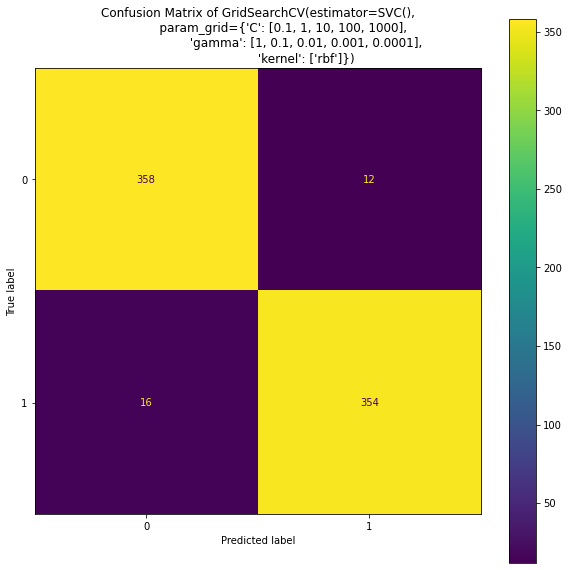

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       370
           1       0.95      0.93      0.94       370

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740




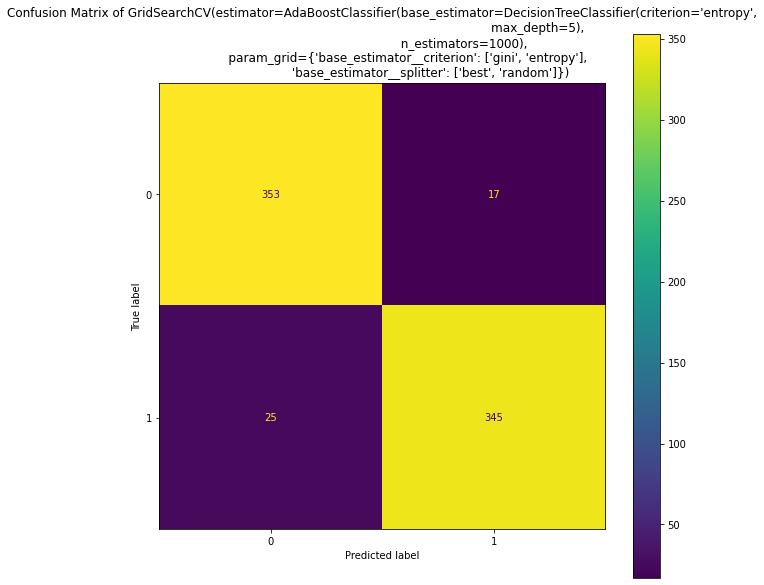

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       370
           1       0.92      0.87      0.89       370

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740




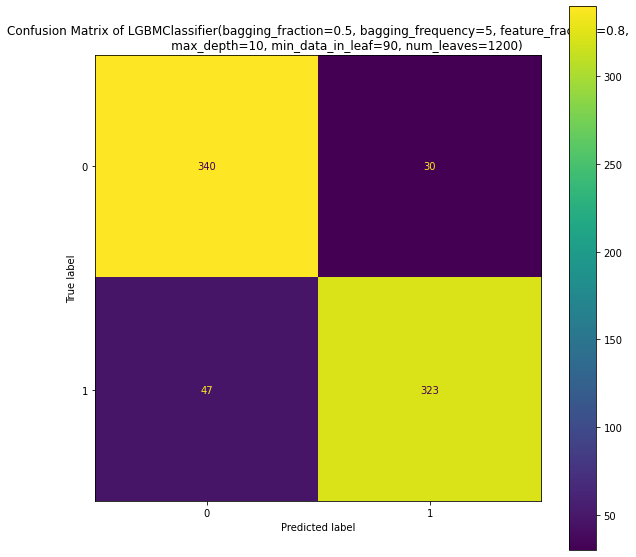

In [ ]:
models =  [decision_tree, random_forest, logistic_regression, xg_boost, k_nn, svc_m, gnb, adb, lgbm]
for model in models:
  print(classification_report(y_test, model.predict(X_test)))
  print()
  cm = confusion_matrix(y_test,model.predict(X_test))
  classes = ["0","1"]
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  fig, ax = plt.subplots(figsize=(10,10))
  plt.title("Confusion Matrix of "+str(model))
  disp = disp.plot(ax=ax)
  plt.show()

In [ ]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=20, learning_rate=0.3).fit(X_train, y_train)
print("F1 Score : {:.2f} ".format(f1_score(lgbm.predict(X_test), y_test)))
print(classification_report(y_test, lgbm.predict(X_test)))

F1 Score : 0.92 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       370
           1       0.94      0.90      0.92       370

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



*   **Confusion Matrix**

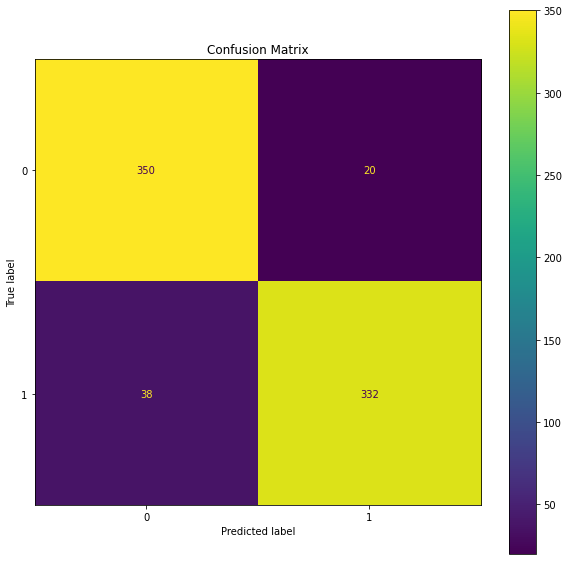

In [ ]:
cm = confusion_matrix(y_test,lgbm.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

*   **ROC Curve**

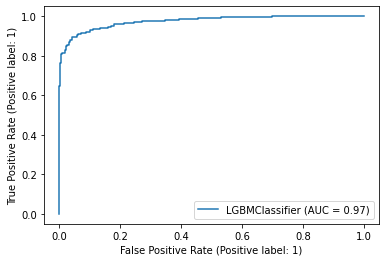

In [ ]:
metrics.plot_roc_curve(lgbm, X_test, y_test)
plt.show()

In [ ]:
!pip install explainerdashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 305 kB 4.3 MB/s 
     |████████████████████████████████| 9.9 MB 61.5 MB/s 
     |████████████████████████████████| 57 kB 5.6 MB/s 
     |████████████████████████████████| 470 kB 34.8 MB/s 
     |████████████████████████████████| 197 kB 50.2 MB/s 
     |████████████████████████████████| 62 kB 982 kB/s 
     |████████████████████████████████| 569 kB 40.6 MB/s 
     |████████████████████████████████| 47 kB 3.8 MB/s 
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 357 kB 62.8 MB/s 
     |████████████████████████████████| 136 kB 49.6 MB/s 
     |████████████████████████████████| 1.6 MB 37.4 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=2496a9db8f62b66266aac2307daed6f9b6eb4ff812acb492e4d66035792aabf9
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c6

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.datasets import feature_descriptions

model = lgbm #change the models for the better Explainable Dashboard

explainer = ClassifierExplainer(model, X_test, y_test,
                                #cats=['Sex', 'Deck'],
                                descriptions=feature_descriptions,
                                labels=['0', '1'])

ExplainerDashboard(explainer).run()

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


 98%|===================| 726/740 [00:32<00:00]       

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>